# Online Retail Exploratory Data Analysis with Python

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Load the Data

In [25]:
retail_data=pd.read_excel('online Retail.xlsx')

In [20]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [34]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 31.0+ MB


## DATA Cleaning And Preprocess

In [36]:
retail_data.duplicated().sum()

5268

In [37]:
#exploring the unique values of each attribute
print("Number of transactions: ", retail_data['InvoiceNo'].nunique())
print("Number of products: ",retail_data['StockCode'].nunique())
print("Number of customers:", retail_data['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_data['CustomerID'].isnull().sum() * 100 / len(retail_data),2),"%" )
print('Number of countries: ',retail_data['Country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers: 4373
Percentage of customers NA:  0.0 %
Number of countries:  38


In [38]:
retail_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [39]:
retail_data['Description'].fillna('Unknown', inplace=True)
retail_data['CustomerID'].fillna('00000', inplace=True)

In [40]:
retail_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [41]:
# change customer id into Integer Datatype

In [42]:
retail_data['CustomerID']=retail_data['CustomerID'].astype('int')

## Explorer The Data

In [43]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,11476.974671
std,218.081158,96.759853,6777.908326
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12352.000000
50%,3.000000,2.080000,14382.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [50]:
retail_data.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,0.018702
UnitPrice,-0.001235,1.000000,-0.020756
CustomerID,0.018702,-0.020756,1.000000


In [45]:
#get cancelled transactions
cancelled_orders = retail_data[retail_data['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [46]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [47]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [49]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = retail_data['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


## Sales Trends and Busiest Sales Months

In [63]:
# Extract Year and Month 
retail_data['YearMonth']=retail_data['InvoiceDate'].dt.to_period('M')

In [64]:
retail_data['YearMonth']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: YearMonth, Length: 541909, dtype: period[M]

In [80]:
monthly_sales = retail_data.groupby('YearMonth')['Quantity'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.strftime('%b %Y')

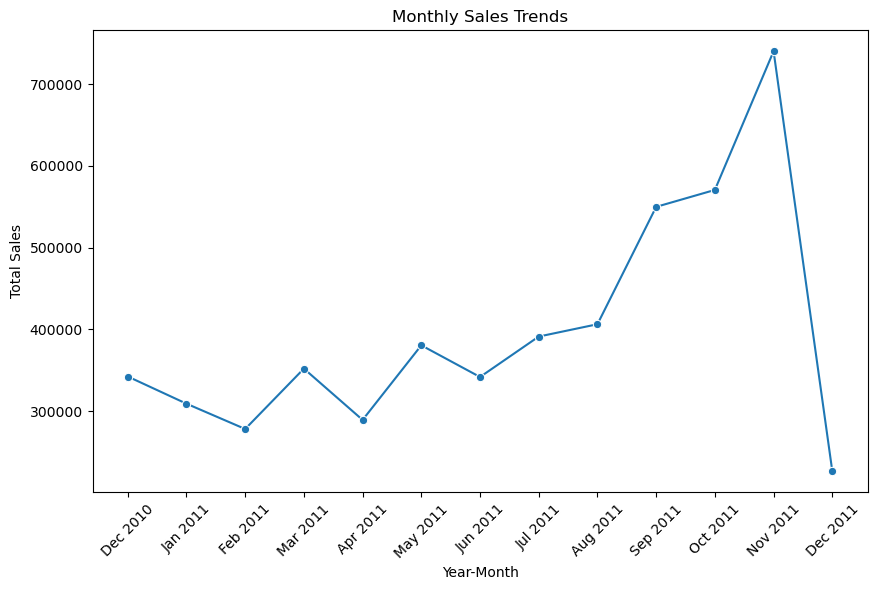

In [81]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='Quantity',data=monthly_sales, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [83]:
# Find the month with the highest sales quantity
busiest_month = monthly_sales.loc[monthly_sales['Quantity'].idxmax()]
print("Busiest Sales Month:", busiest_month['YearMonth'])
print("Sales Quantity:", busiest_month['Quantity'])

Busiest Sales Month: Nov 2011
Sales Quantity: 740286


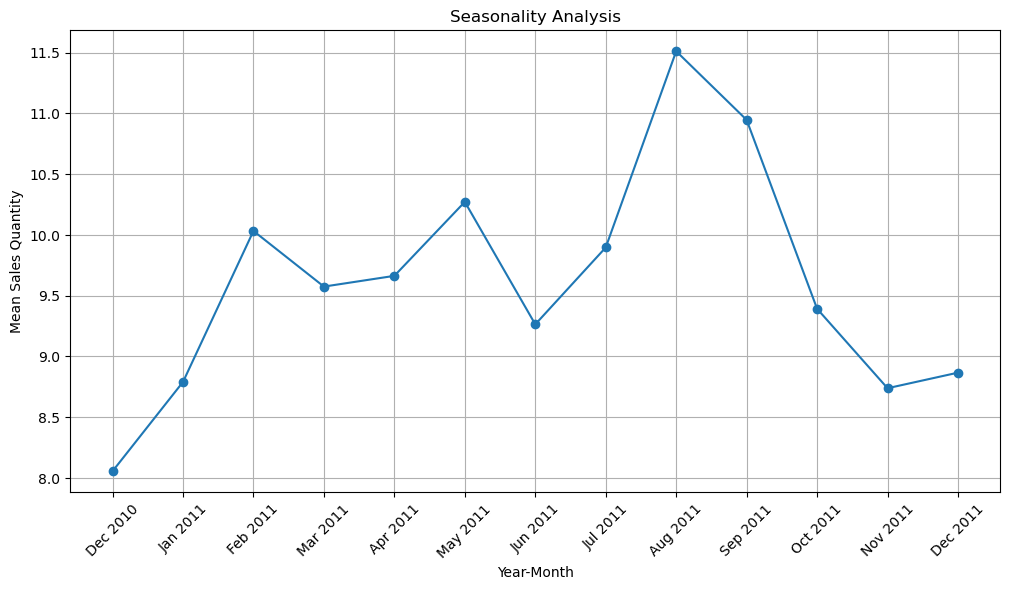

In [85]:
# Calculate monthly mean sales quantity
monthly_mean = retail_data.groupby('YearMonth')['Quantity'].mean().reset_index()
monthly_mean['YearMonth'] = monthly_mean['YearMonth'].dt.strftime('%b %Y')
# Plot monthly mean sales quantity to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean['YearMonth'], monthly_mean['Quantity'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Mean Sales Quantity')
plt.title('Seasonality Analysis')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Popular Products: Determine the best-selling products and their quantities.

In [91]:
# Calculate total sales quantity for each product
product_sales = retail_data.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by sales quantity in descending order
product_sales = product_sales.sort_values(by='Quantity', ascending=False)

# Display the top 10 best-selling products and their quantities
print("Top 10 Best-Selling Products:")
print(product_sales.head(10))

Top 10 Best-Selling Products:
                             Description  Quantity
4010   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNAMENT     36381
2740                      POPCORN HOLDER     36334
2395     PACK OF 72 RETROSPOT CAKE CASES     36039
3919  WHITE HANGING HEART T-LIGHT HOLDER     35317
2803                  RABBIT NIGHT LIGHT     30680
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753


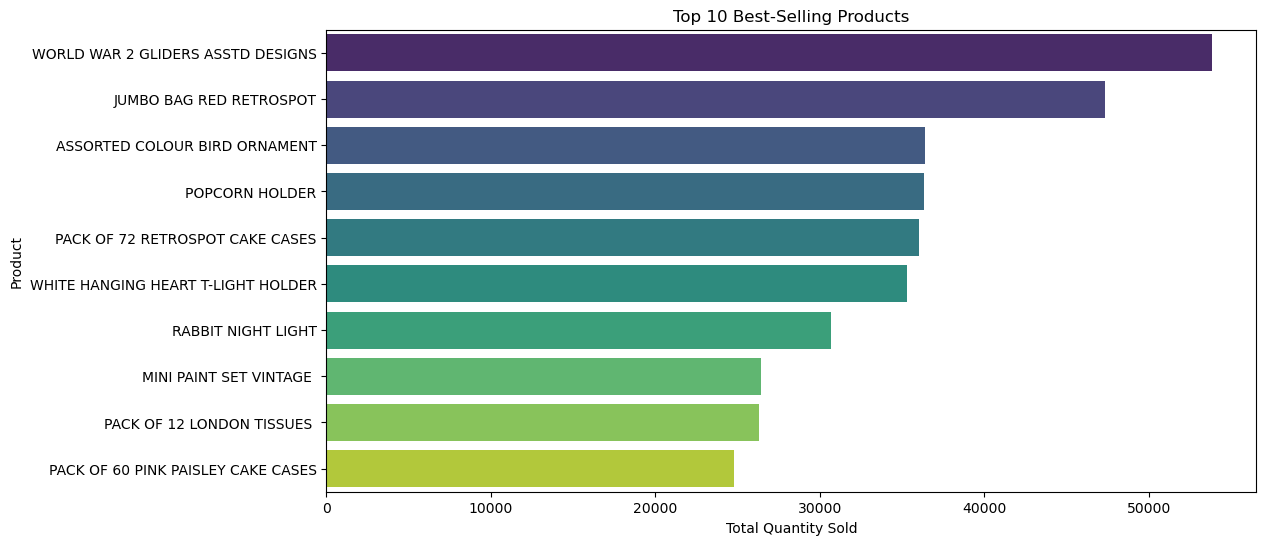

In [96]:
top_products = product_sales.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_products, palette='viridis')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Best-Selling Products')
plt.show()

## Determine the best-selling Counties and their quantities.

In [112]:
# Group data by country and calculate total quantity sold for each country
country_quantity = retail_data.groupby('Country')['Quantity'].sum().reset_index()

# Sort countries by total quantity sold in descending order
country_quantity = country_quantity.sort_values(by='Quantity', ascending=False)

# Display the top-selling countries based on quantity sold
top_n_countries = 5  # Change this to see more or fewer top-selling countries
top_selling_countries = country_quantity.head(top_n_countries)
print("\nTop-Selling Countries based on Quantity Sold:")
print(top_selling_countries)


Top-Selling Countries based on Quantity Sold:
           Country  Quantity
36  United Kingdom   4263829
24     Netherlands    200128
10            EIRE    142637
14         Germany    117448
13          France    110480


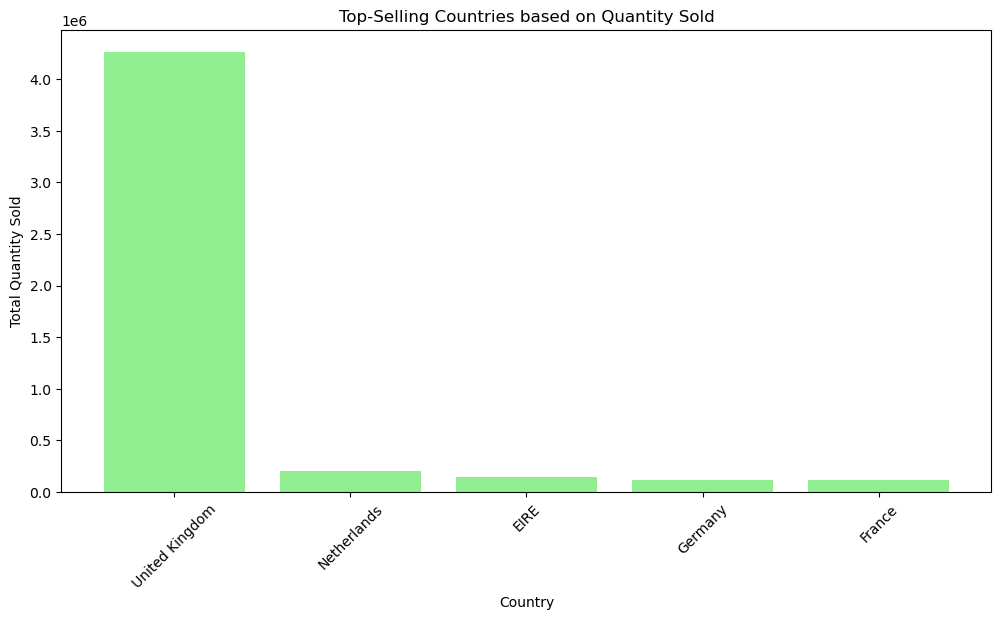

In [114]:
plt.figure(figsize=(12, 6))
plt.bar(top_selling_countries['Country'], top_selling_countries['Quantity'], color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.title('Top-Selling Countries based on Quantity Sold')
plt.xticks(rotation=45)

plt.show()

## Customer Value: Identify the most valuable customers based on their spending.

In [108]:
retail_data['Total_Price']=retail_data['Quantity']*retail_data['UnitPrice']

In [110]:
customer_spending = retail_data.groupby('CustomerID')['Total_Price'].sum().reset_index()

# Sort customers by total spending in descending order (most valuable first)
customer_spending = customer_spending.sort_values(by='Total_Price', ascending=False)

# Display the top 10 most valuable customers
top_n = 10
top_valuable_customers = customer_spending.head(top_n)
print(top_valuable_customers)

      CustomerID  Total_Price
0              0   1447682.12
1704       14646    279489.02
4234       18102    256438.49
3759       17450    187482.17
1896       14911    132572.62
56         12415    123725.45
1346       14156    113384.14
3802       17511     88125.38
3203       16684     65892.08
1006       13694     62653.10


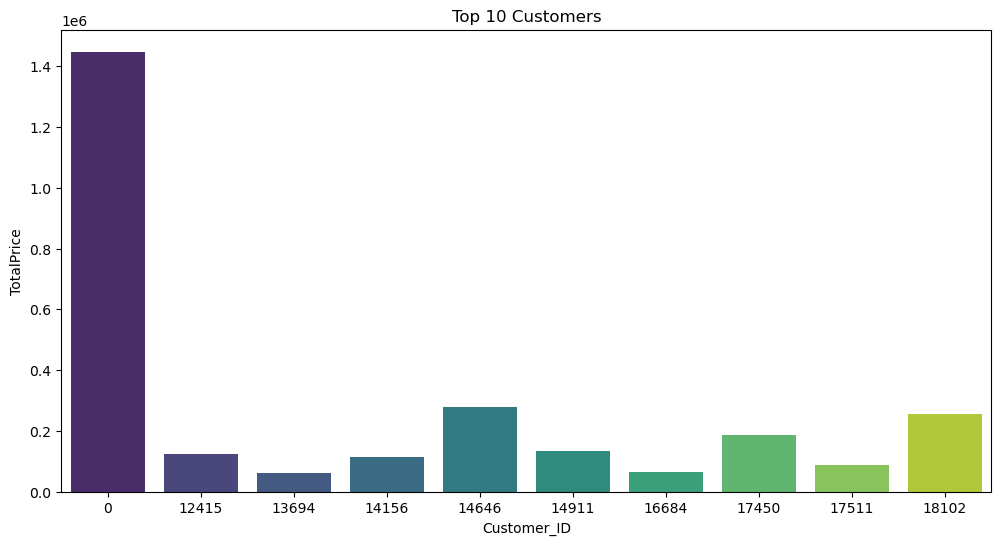

In [111]:
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='Total_Price', data=top_valuable_customers, palette='viridis')
plt.xlabel('Customer_ID')
plt.ylabel('TotalPrice')
plt.title('Top 10 Customers')
plt.show()

## Identify Any Outliers

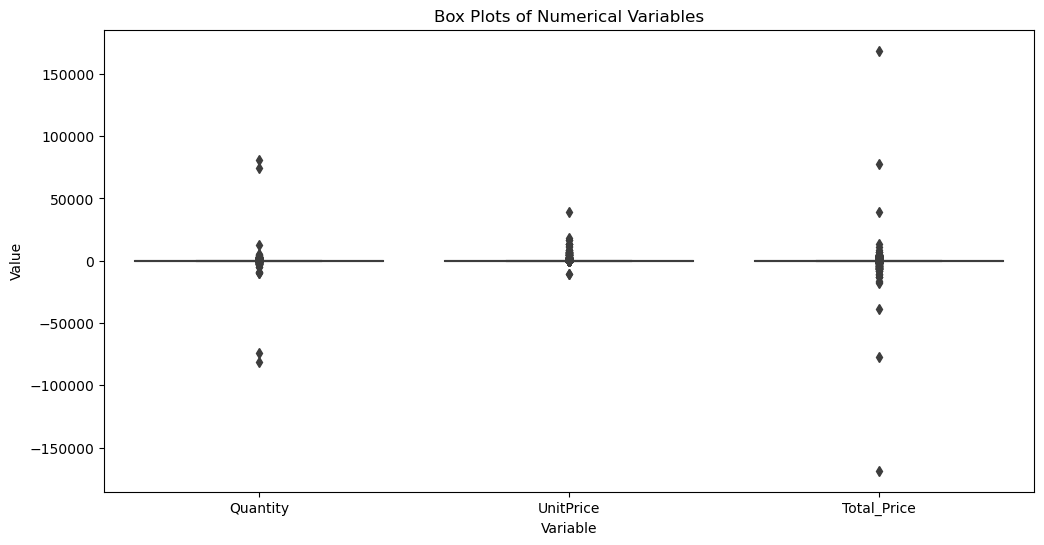

In [117]:
# Visualize numerical variables using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=retail_data[['Quantity', 'UnitPrice', 'Total_Price']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plots of Numerical Variables')
plt.show()

In [119]:
from scipy.stats import zscore

# Calculate Z-scores for numerical variables
z_scores = zscore(retail_data[['Quantity', 'UnitPrice', 'Total_Price']])

# Identify outliers based on Z-scores
outliers = (abs(z_scores) > 3).any(axis=1)
outliers_df = retail_data[outliers]

print("Outliers:")
print(outliers_df)


Outliers:
       InvoiceNo StockCode                          Description  Quantity  \
870       536477     21137             BLACK RECORD COVER FRAME       480   
1814      536544       DOT                       DOTCOM POSTAGE         1   
3041      536592       DOT                       DOTCOM POSTAGE         1   
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
4505      536785     22423             REGENCY CAKESTAND 3 TIER       144   
...          ...       ...                                  ...       ...   
540071    581459     22197                       POPCORN HOLDER      1200   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   
540908    581492       DOT                       DOTCOM POSTAGE         1   
541540    581498       DOT                       DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country

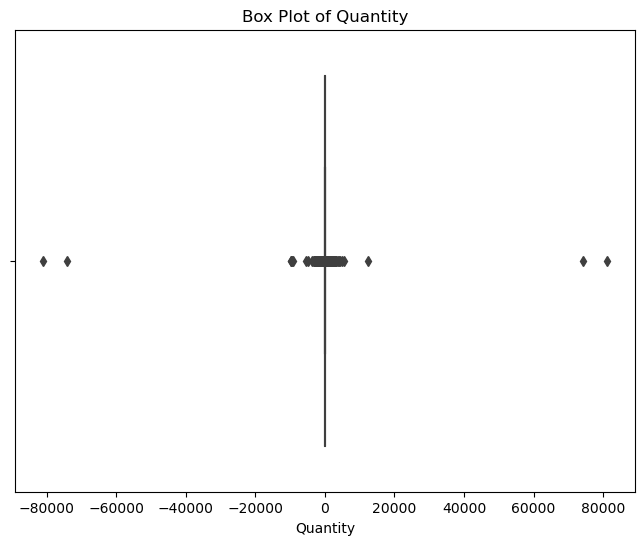

In [120]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=retail_data['Quantity'])
plt.xlabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()

## Summarize EDA


1. Top Selling Country: The top-selling country in the online retail store dataset is the United Kingdom. This country contributes the highest quantity of sales among all the countries represented in the dataset.

2. Busiest Sale Month: The busiest sales month in the dataset is November 2011. During this month, the quantity of sales reached its peak, indicating a significant increase in customer purchasing activity.

3. Outliers: Outliers were identified in various fields such as Quantity, UnitPrice, and TotalPrice. These outliers could potentially indicate data entry errors or unusual purchase behaviors. Proper handling of outliers is crucial to ensure the accuracy of analysis and insights.

Overall, the exploratory data analysis (EDA) provided valuable insights into the store's sales trends, product popularity, and customer behavior. Understanding the top-selling country and busiest sales month can help the business plan targeted marketing strategies and promotions. Additionally, identifying outliers allows the business to clean the data and make data-driven decisions based on reliable information.
By leveraging the findings from the EDA, the online retail store can optimize inventory management, target high-value customers, improve customer satisfaction, and enhance overall business performance in the competitive market. Continuous monitoring and analysis of sales data will be essential to stay informed about evolving customer preferences and trends in the online retail industry.